In [58]:
from pandas import read_csv, DataFrame

data = read_csv("C:/Users/harsh/OneDrive/Documents/Classes/Emperical/house-price-prediction-master/train.csv")

In [59]:
# Features
col_features = data.columns.tolist()

if "Id" in col_features:
    col_features.remove("Id")
    
if "SalePrice" in col_features:
    col_features.remove("SalePrice")

col_features

##

# Features by dtype

col_features
dtype_of_col = {}

for feature in col_features:
    
    feature_dtype = str(data.dtypes[feature])
    
    try:
        dtype_of_col[feature_dtype]
    except KeyError:
        dtype_of_col[feature_dtype] = []
        
    
    dtype_of_col[feature_dtype].append(feature)

dtypes = dtype_of_col.keys()

col_features

categorical_features = dtype_of_col["object"]
categorical_features = categorical_features + ["MSSubClass"]

categorical_features

# Binary Features

binary_features = [c for c in categorical_features if len(data[c].unique()) == 2]

binary_features

# Numerical Features

float_features = dtype_of_col["float64"]
int_features = dtype_of_col["int64"]
numerical_features = float_features + int_features
remove_list = ["GarageYrBlt", "YearBuilt", "YearRemodAdd", "MoSold", "YrSold", "MSSubClass"]
numerical_features = [n for n in numerical_features if n not in remove_list]

numerical_features

# Has Zero Features

has_zero_features = []

for n in numerical_features:
    if 0 in data[n].unique():
        has_zero_features.append(n)
        
has_zero_features

# Bounded Features

bounded_features = ["OverallQual", "OverallCond"]

# Temporal Features

temporal_features = remove_list.copy()
temporal_features.remove("MSSubClass")

temporal_features

# Summary

col_features
categorical_features, numerical_features, temporal_features
binary_features, has_zero_features, 

pass

In [60]:
data = data[categorical_features + ["SalePrice"]]
data = data.fillna("Unknown")

## Q-1 - Which feature affects most on house price ? - All sub-classes within each categorical variable are statistically significant. 

In [71]:
from scipy.stats import chisquare

temp = {}

for c in categorical_features:
    unit = data.groupby(c).count()["SalePrice"]
    temp[c] = chisquare(unit)
    
chisquare_dataframe = DataFrame(data=temp, index=["chi-square test statistic", "pVal"])
chisquare_dataframe.round(2).T

## Q-1 - Which feature affects most on house price ?

,chi-square test statistic,pVal
MSZoning,3255.43,0.0
Street,1436.10,0.0
Alley,2399.61,0.0
LotShape,1530.85,0.0
LandContour,3270.10,0.0
Utilities,1456.00,0.0
LotConfig,2604.84,0.0
LandSlope,2473.53,0.0
Neighborhood,1034.52,0.0
Condition1,8388.93,0.0


## Q-2: What are the features, significantly related with each other ? 
## A Table of p-values from Chi-square Two Way Tests

In [46]:
p_value_table = DataFrame(index = categorical_features, columns = categorical_features)

from scipy.stats import chi2_contingency
from pandas import crosstab

def is_statistically_significant(p):
        
    if p < 0.05:
        return 1
    else:
        return 0

duplicate = []
for c in categorical_features:
    
    duplicate.append(c)
    
    for cc in categorical_features:
        if not c == cc: # and cc not in duplicate:
            crosstable = crosstab(data[c], data[cc])
            chi2, p, dof, expected = chi2_contingency(crosstable)
            p_value_table[c][cc] = is_statistically_significant(p)

In [47]:
p_value_table

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass
MSZoning,NaN,1,1,1,1,0,1,1,1,1,...,1,1,1,1,0,0,0,1,1,1
Street,1,NaN,0,0,1,1,0,1,1,1,...,0,0,0,0,0,0,1,1,1,1
Alley,1,0,NaN,1,1,0,0,0,1,1,...,1,1,1,1,0,0,0,0,1,1
LotShape,1,0,1,NaN,1,0,1,1,1,1,...,1,1,1,1,1,0,0,0,0,1
LandContour,1,1,1,1,NaN,0,1,1,1,0,...,1,0,0,1,0,0,0,0,1,1
Utilities,0,1,0,0,0,NaN,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
LotConfig,1,0,0,1,1,1,NaN,1,1,1,...,0,0,1,0,0,0,0,0,0,1
LandSlope,1,1,0,1,1,0,1,NaN,1,0,...,0,0,0,0,0,0,0,0,0,1
Neighborhood,1,1,1,1,1,1,1,1,NaN,1,...,1,1,1,1,0,1,0,1,1,1
Condition1,1,1,1,1,0,0,1,0,1,NaN,...,1,0,0,1,1,0,1,0,0,1


 - 1 means statistically significant (p < 0.05) 
 - 0 means non-significant (p >= 0.05)

## Heatmap of Statistically Significant vs Non-significant Categorical x Categorical Relationships

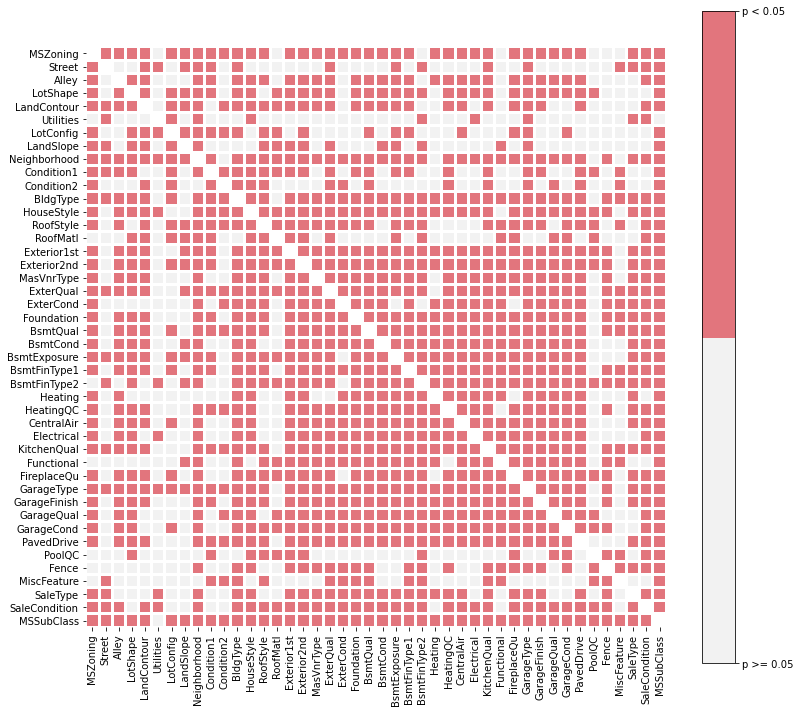

In [53]:
from seaborn import heatmap
import seaborn as snsbrn
import matplotlib.pyplot as plot
from matplotlib import colors
from numpy import float32

plot.figure(figsize=(13,12))

p = snsbrn.diverging_palette(10, 220, sep=80, n=10)
myColors = [p[4], p[1]]
cmap = colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

ax = heatmap(p_value_table.fillna(float32(None)), linewidths=2, cmap=cmap, cbar=False, square=True)
cbar = ax.figure.colorbar(ax.collections[0])
cbar.set_ticks([1, 0])
cbar.set_ticklabels(["p < 0.05", "p >= 0.05"])
plot.show()

## Q-3: What are the features, highly significant? Show their percentage.
## Number of categorical x categorical relationships that are statistically significant vs non-significant

In [72]:
p_value_data = {}

for c in categorical_features:
    
    p_value_data[c] = {}
    row = p_value_data[c]
    
    col_val_cntr = p_value_table[c].value_counts()
    reltn_cntr = len(categorical_features) - 1
    significant = 0
    nonsignificant = 0
    
    if not col_val_cntr.empty:
        
        if 1 in col_val_cntr.keys():
            
            significant += col_val_cntr[1]
            
        if 0 in col_val_cntr.keys():
            
            nonsignificant += col_val_cntr[0]
        
        row["p < 0.05"] = significant
        row["p >= 0.05"] = nonsignificant
        row["Percentage of Relationships Significant"] = ("%.1f" % ((significant / reltn_cntr) * 100)) + "%"
        
DataFrame(data = p_value_data).T.sort_values("p < 0.05", ascending=False)

,p < 0.05,p >= 0.05,Percentage of Relationships Significant
MSSubClass,42,1,97.7%
GarageType,40,3,93.0%
Neighborhood,39,4,90.7%
ExterQual,39,4,90.7%
BldgType,39,4,90.7%
Exterior2nd,39,4,90.7%
Exterior1st,38,5,88.4%
KitchenQual,38,5,88.4%
BsmtQual,38,5,88.4%
HouseStyle,38,5,88.4%
